In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [108]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

# US Army ANSUR Body Measurement Dataset

In [3]:
ansur1 = pd.read_csv('./ansur_1.csv')
print(ansur1.shape)
ansur1.head()

(200, 4)


,Gender,weight_kg,stature_m,body_height
0,Male,81.5,1.776,69.92
1,Male,72.6,1.702,67.01
2,Male,92.9,1.735,68.31
3,Male,79.4,1.655,65.16
4,Male,94.6,1.914,75.35


In [5]:
ansur2 = pd.read_csv('./ansur_2.csv')
print(ansur2.shape)
ansur2.head()

(200, 4)


,Gender,footlength,headlength,n_legs
0,Male,273,206,2
1,Male,263,201,2
2,Male,270,202,2
3,Male,267,199,2
4,Male,305,197,2


In [9]:
ansur1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       200 non-null    object 
 1   weight_kg    200 non-null    float64
 2   stature_m    200 non-null    float64
 3   body_height  200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [8]:
ansur2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      200 non-null    object
 1   footlength  200 non-null    int64 
 2   headlength  200 non-null    int64 
 3   n_legs      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
ansur1.describe(include='all')

,Gender,weight_kg,stature_m,body_height
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Male,NaN,NaN,NaN
freq,100,NaN,NaN,NaN
mean,NaN,77.165000,1.693730,66.682200
std,NaN,14.753212,0.089873,3.538176
min,NaN,47.100000,1.446000,56.930000
25%,NaN,67.500000,1.630000,64.170000
50%,NaN,74.300000,1.684500,66.320000
75%,NaN,86.625000,1.754000,69.060000


In [11]:
ansur2.describe(include='all')

,Gender,footlength,headlength,n_legs
count,200,200.000000,200.000000,200.0
unique,2,NaN,NaN,NaN
top,Male,NaN,NaN,NaN
freq,100,NaN,NaN,NaN
mean,NaN,258.275000,194.385000,2.0
std,NaN,16.843035,8.795658,0.0
min,NaN,215.000000,176.000000,2.0
25%,NaN,247.000000,188.000000,2.0
50%,NaN,257.000000,194.000000,2.0
75%,NaN,269.000000,200.250000,2.0


## Visually detecting redundant features

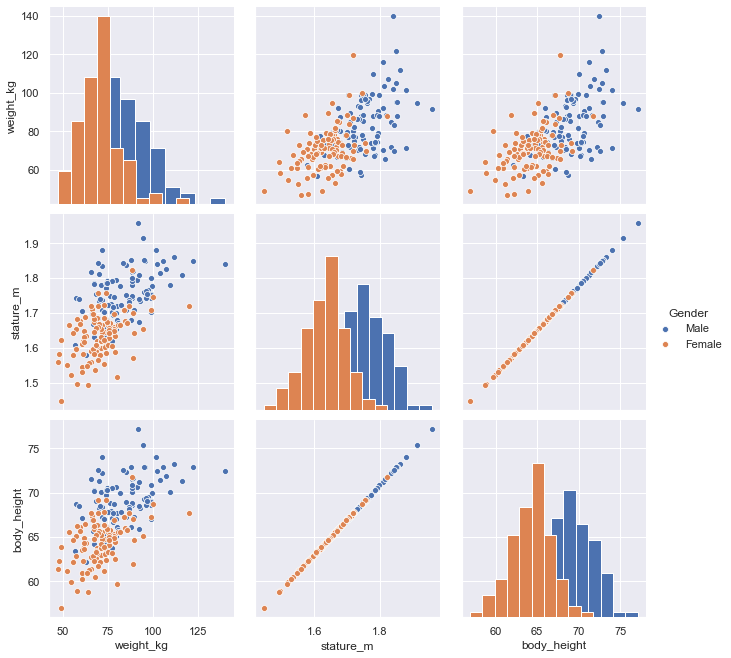

In [23]:
# create a pairplot and color by gender
sns.pairplot(data=ansur1,
             hue='Gender',
             diag_kind='hist',
             height=3)

plt.show()

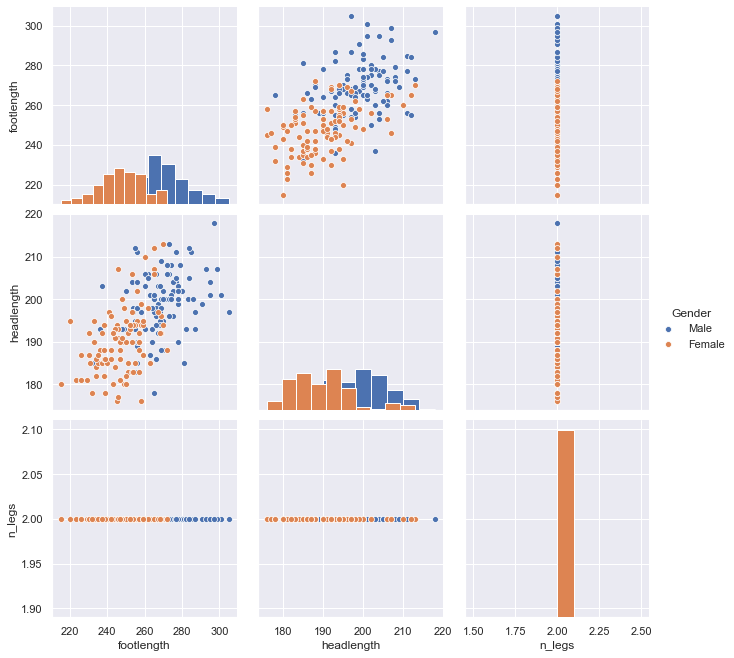

In [24]:
# create a pairplor and color by gender
sns.pairplot(data=ansur2,
             hue='Gender',
             diag_kind='hist',
             height=3)
plt.show()

In [25]:
# from the pairplot of ansur1, redundant features can be seen with stature_m and body_height, so one of them is dropped
r_ansur1 = ansur1.drop('stature_m', axis=1)

# likewise with ansur2, where n_legs don't give any added value as everyone has 2 legs
r_ansur2 = ansur2.drop('n_legs', axis=1)

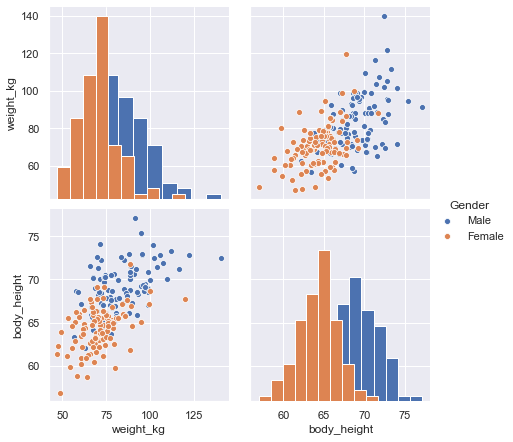

In [26]:
sns.pairplot(data=r_ansur1,
             hue='Gender',
             diag_kind='hist',
             height=3)

plt.show()

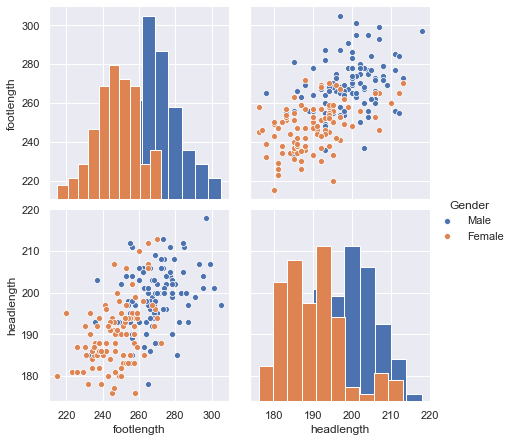

In [27]:
sns.pairplot(data=r_ansur2,
             hue='Gender',
             diag_kind='hist',
             height=3)

plt.show()

# A more exhaustive ANSUR Dataset

In [30]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [31]:
ansur_m = pd.read_csv('./ANSUR_II_MALE.csv')
print(ansur_m.shape)
ansur_m.head()

(4082, 99)


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [32]:
ansur_f = pd.read_csv('./ANSUR_II_FEMALE.csv')
print(ansur_f.shape)
ansur_f.head()

(1986, 99)


,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [36]:
# merge female and male ANSUR data
ansur = pd.concat([ansur_m, ansur_f], axis=0)

In [37]:
to_drop = ['weight_kg', 'stature_m', 'BMI', 'BMI_class', 'Height_class'] # these are not initially included in the DataCamp dataset
ansur_ = ansur.drop(to_drop, axis=1)
ansur_.shape

(6068, 94)

In [39]:
ansur_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Data columns (total 94 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Branch                          6068 non-null   object
 1   Component                       6068 non-null   object
 2   Gender                          6068 non-null   object
 3   abdominalextensiondepthsitting  6068 non-null   int64 
 4   acromialheight                  6068 non-null   int64 
 5   acromionradialelength           6068 non-null   int64 
 6   anklecircumference              6068 non-null   int64 
 7   axillaheight                    6068 non-null   int64 
 8   balloffootcircumference         6068 non-null   int64 
 9   balloffootlength                6068 non-null   int64 
 10  biacromialbreadth               6068 non-null   int64 
 11  bicepscircumferenceflexed       6068 non-null   int64 
 12  bicristalbreadth                6068 non-null   

## t-SNE on ANSUR Numeric Data

In [41]:
# non-numerical columns in dataset
non_numeric = ['Branch', 'Gender', 'Component']

In [44]:
# drop numerical columns
ansur_num = ansur_.drop(non_numeric, axis=1)

In [45]:
# initialize tSNE
m = TSNE(learning_rate=50)

In [57]:
# fit and transform
tsne_features = m.fit_transform(ansur_num)
print(tsne_features.shape)

ansur_['x'] = tsne_features[:, 0]
ansur_['y'] = tsne_features[:, 1]

(6068, 2)


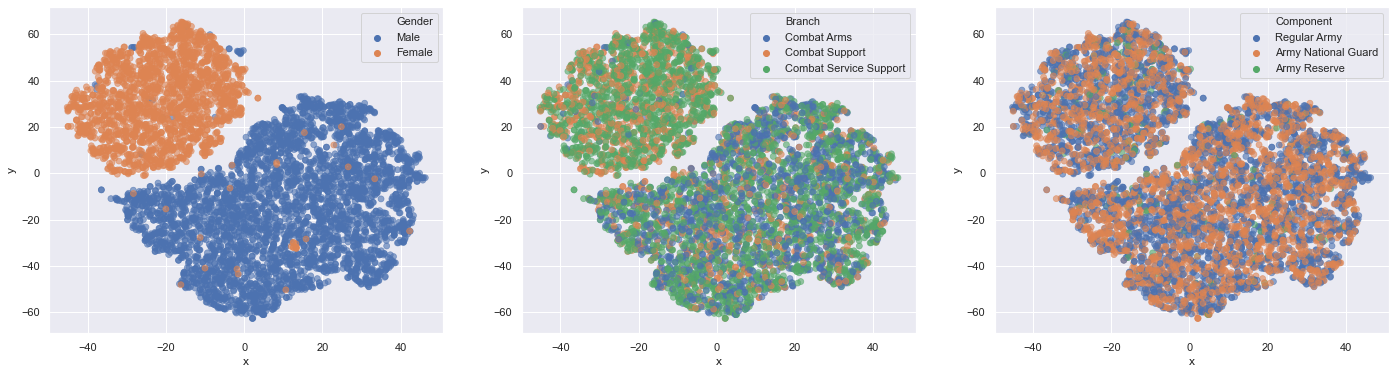

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

sns.scatterplot(x='x',
                y='y',
                hue='Gender',
                data=ansur_,
                ax=ax[0],
                edgecolor=None,
                alpha=0.6)
sns.scatterplot(x='x',
                y='y',
                hue='Branch',
                data=ansur_,
                ax=ax[1],
                edgecolor=None,
                alpha=0.6)
sns.scatterplot(x='x',
                y='y',
                hue='Component',
                data=ansur_,
                ax=ax[2],
                edgecolor=None,
                alpha=0.6)

plt.show()

In the first plot, we see that there is a `Male` and `Female` cluster. Then in the second plot, we see that there are more males in the `Combat Arms` Branch.

## Check for overfitting

In [66]:
# merge female and male ANSUR data and subsample
ansur_ = pd.concat([ansur_m.iloc[:500, :], ansur_f.iloc[:500, :]], axis=0)
ansur_ = ansur_.drop(to_drop, axis=1)
ansur_.shape

(1000, 94)

In this case, we aim to predict `Gender` and not use the other categorical variables `Component` and `Branch`

In [67]:
ansur_.drop(['Branch', 'Component'], axis=1, inplace=True)
ansur_.shape

(1000, 92)

In [68]:
X = ansur_.drop('Gender', axis=1)
y = ansur_['Gender']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)
print(f'{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set. {X_test.shape[1]} Features')

300 rows in test set vs. 700 in training set. 91 Features


In [82]:
# For this one, we use SVC as our classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [83]:
# eval
train_acc = accuracy_score(y_train, svc.predict(X_train))
test_acc = accuracy_score(y_test, svc.predict(X_test))

print(f'{train_acc: 0.1%} train acc vs. {test_acc: 0.1%} test acc')

 94.0% train acc vs.  95.3% test acc


Contrary to DataCamp's, mine doesn't overfit. Oops. That said, let's still do the drastic dim. reduction by choosing just a single feature

In [85]:
X = ansur_['neckcircumferencebase']
y = ansur_['Gender']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [92]:
svc = SVC()
svc.fit(X_train.to_numpy().reshape(-1, 1), y_train)

SVC()

In [94]:
# eval
train_acc = accuracy_score(y_train, svc.predict(X_train.to_numpy().reshape(-1, 1)))
test_acc = accuracy_score(y_test, svc.predict(X_test.to_numpy().reshape(-1, 1)))

print(f'{train_acc: 0.1%} train acc vs. {test_acc: 0.1%} test acc')

 94.0% train acc vs.  93.7% test acc


## Features with missing values or little variance

This time, we work on a subsampled ANSUR containing only head measurements

In [98]:
ansur_head = pd.read_csv('./ansur_head.csv')
print(ansur_head.shape)
ansur_head.head()

(6068, 6)


,headbreadth,headcircumference,headlength,tragiontopofhead,n_hairs,measurement_error
0,150,583,206,140,100016.243454,0.1
1,146,568,201,120,99993.882436,0.1
2,148,573,202,125,99994.718282,0.1
3,158,576,199,127,99989.270314,0.1
4,153,566,197,122,100008.654076,0.1


In [99]:
ansur_head.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   headbreadth        6068 non-null   int64  
 1   headcircumference  6068 non-null   int64  
 2   headlength         6068 non-null   int64  
 3   tragiontopofhead   6068 non-null   int64  
 4   n_hairs            6068 non-null   float64
 5   measurement_error  6068 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 284.6 KB


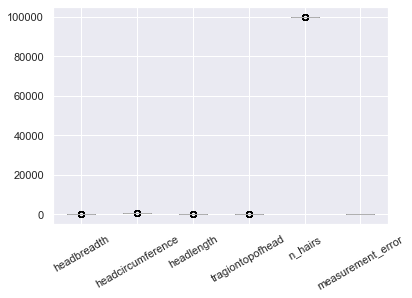

In [104]:
# boxplot with normalized values
ansur_head.boxplot(rot=30)
plt.show()

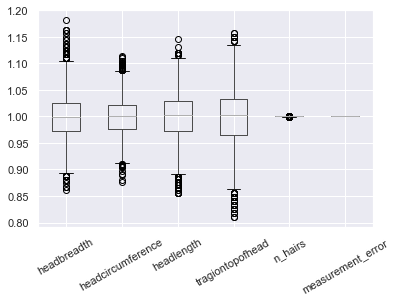

In [103]:
# normalize data by dividing df with their mean values
ansur_head_norm = ansur_head / ansur_head.mean()

# boxplot
ansur_head_norm.boxplot(rot=30)
plt.show()

In [107]:
# variances
ansur_head_norm.std()**2

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64

If we want to remove the the lowest variances $1.0\times 10^{-3}$ would be a good variance threshold

In [109]:
# create VarianceThreshold feature selector
sel = VarianceThreshold(threshold=1e-3)

In [110]:
# fit to normalized ansur data
sel.fit(ansur_head_norm)

VarianceThreshold(threshold=0.001)

In [111]:
# create boolean mask
mask = sel.get_support()

In [113]:
# apply mask to orig df to create reduced df
ansur_head_reduced = ansur_head.loc[:, mask]
print(f'Dim reduced from {ansur_head.shape[1]} to {ansur_head_reduced.shape[1]}')

Dim reduced from 6 to 4


## Inspecting correlation

This time, we subsample ANSUR to contain only body measurements

In [121]:
body_measures = ['elbowrestheight', 'wristcircumference',
                 'anklecircumference', 'buttockheight', 'crotchheight']
ansur_body = ansur[body_measures]
ansur_body.shape

(6068, 5)

In [123]:
ansur_body.columns = ['Elbow Rest Height', 'Wrist Circumference',
                      'Ankle Circumference', 'Buttock Height', 'Crotch Height']
ansur_body.head()

,Elbow Rest Height,Wrist Circumference,Ankle Circumference,Buttock Height,Crotch Height
0,247,175,222,882,877
1,232,167,220,870,851
2,237,180,230,901,854
3,272,176,230,821,769
4,188,188,247,1080,1014


In [124]:
# create correlation matrix
corr = ansur_body.corr()

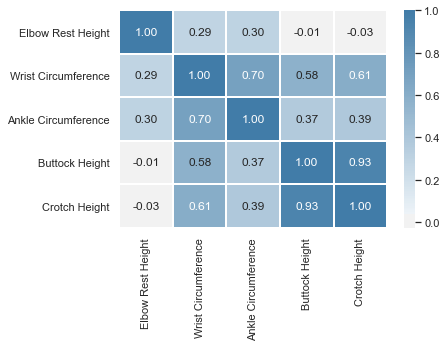

In [127]:
# draw the heatmap
cmap = sns.diverging_palette(h_neg=10,
                             h_pos=240,
                             as_cmap=True)

sns.heatmap(corr,
            cmap=cmap,
            center=0,
            linewidths=1, 
            annot=True,
            fmt="0.2f")

plt.show()

In [128]:
# generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

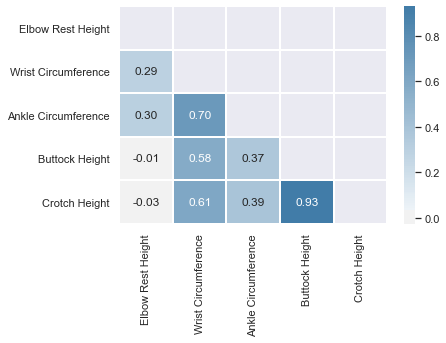

In [131]:
# apply mask
sns.heatmap(corr,
            cmap=cmap,
            center=0,
            mask=mask,
            linewidths=1, 
            annot=True,
            fmt="0.2f")

plt.show()

## Filtering out highly correlated features

This time, we will remove highly correlated features in the Male ANSUR Dataset

In [133]:
ansur_ = ansur_m.copy()
ansur_.shape

(4082, 99)

In [134]:
# calculate the correlation matrix and take the abs value for the neg corrs
corr = ansur_.corr().abs()

In [135]:
# create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# apply mask
tri_df = corr.mask(mask)

In [136]:
# list column names of highly correlated features
drop = [c for c in tri_df.columns if any(tri_df[c]>0.95)]

In [140]:
# drop the features
ansur_reduced = ansur_.drop(drop, axis=1)
print(f'The reduced dataframe has {ansur_reduced.shape[1]}')

The reduced dataframe has 88


# Boston Public Schools Dataset

In [114]:
bps = pd.read_csv('./public_schools.csv')
print(bps.shape)
bps.head()

(131, 21)


,x,y,objectid_1,objectid,bldg_id,bldg_name,address,city,zipcode,csp_sch_id,sch_id,sch_name,sch_label,sch_type,shared,complex,label,tlt,pl,point_x,point_y
0,-71.004121,42.388799,1,1,1,Guild Bldg,195 Leyden Street,East Boston,2128,4061,4061,Guild Elementary,Guild,ES,NaN,NaN,52,3,Grace,790128.152748,2.967094e+06
1,-71.030480,42.378545,2,2,3,"Kennedy, P Bldg",343 Saratoga Street,East Boston,2128,4541,4541,Kennedy Patrick Elem,PJ Kennedy,ES,NaN,NaN,72,3,Grace,783027.745829,2.963318e+06
2,-71.033891,42.375279,3,3,4,Otis Bldg,218 Marion Street,East Boston,2128,4322,4322,Otis Elementary,Otis,ES,NaN,NaN,106,3,Grace,782112.823908,2.962122e+06
3,-71.038011,42.378089,4,4,6,Odonnell Bldg,33 Trenton Street,East Boston,2128,4543,4543,O'Donnell Elementary,O'Donnell,ES,NaN,NaN,103,3,Grace,780994.000003,2.963140e+06
4,-71.034921,42.380957,5,5,7,East Boston High Bldg,86 White Street,East Boston,2128,1070,1070,East Boston High,East Boston HS,HS,NaN,NaN,36,2,Joel,781823.000004,2.964190e+06


In [115]:
bps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           131 non-null    float64
 1   y           131 non-null    float64
 2   objectid_1  131 non-null    int64  
 3   objectid    131 non-null    int64  
 4   bldg_id     131 non-null    int64  
 5   bldg_name   131 non-null    object 
 6   address     131 non-null    object 
 7   city        131 non-null    object 
 8   zipcode     131 non-null    int64  
 9   csp_sch_id  131 non-null    int64  
 10  sch_id      131 non-null    int64  
 11  sch_name    131 non-null    object 
 12  sch_label   131 non-null    object 
 13  sch_type    131 non-null    object 
 14  shared      16 non-null     object 
 15  complex     2 non-null      object 
 16  label       131 non-null    int64  
 17  tlt         131 non-null    int64  
 18  pl          131 non-null    object 
 19  point_x     131 non-null    f

## Removing features with many missing values

In [116]:
bps.isna().sum() / len(bps)

x             0.000000
y             0.000000
objectid_1    0.000000
objectid      0.000000
bldg_id       0.000000
bldg_name     0.000000
address       0.000000
city          0.000000
zipcode       0.000000
csp_sch_id    0.000000
sch_id        0.000000
sch_name      0.000000
sch_label     0.000000
sch_type      0.000000
shared        0.877863
complex       0.984733
label         0.000000
tlt           0.000000
pl            0.000000
point_x       0.000000
point_y       0.000000
dtype: float64

In [117]:
# create mask on whether each feature less than 50% missing values
mask = bps.isna().sum() / len(bps) < 0.5

In [118]:
# create reduced dataset by applying the mask
bps_reduced = bps.loc[:, mask]

In [119]:
print(bps.shape)
print(bps_reduced.shape)

(131, 21)
(131, 19)


# Nuclear energy and pool drowning Dataset

In [141]:
weird_df = pd.read_csv('./weird_df.csv')
print(weird_df.shape)
weird_df.head()

(11, 2)


,pool_drownings,nuclear_energy
0,421,728.3
1,465,753.9
2,494,768.8
3,538,780.1
4,430,763.7


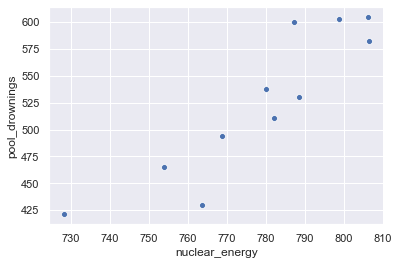

In [142]:
sns.scatterplot(x='nuclear_energy',
                y='pool_drownings',
                data=weird_df)
plt.show()

In [143]:
weird_df.corr()

,pool_drownings,nuclear_energy
pool_drownings,1.000000,0.901179
nuclear_energy,0.901179,1.000000


Despite the high correlation, this does not make sense. Rightfully so, correlation does not imply causation.